John Rapp Farnes | 405461225

#
$$
J=-\sum_{n=1}^{N}[y_n\log h_w(x_n)+(1-y_n)\log (1-h_w(x_n))]+\frac{1}{2}\underbrace{\sum_i w_i ^2}_{=w^Tw}
$$

We have 

$$
\frac{dh_w(x)}{dw}=\sigma' (w^Tx)x=\sigma(w^Tx)(1-\sigma (w^Tx))x
$$

and

$$
\frac{dw^Tw}{dw}=2w
$$


Therefore 

$$
\begin{aligned}
\frac{dJ}{dw}&=-\sum_{n=1}^{N}[y_n \frac{1}{\sigma(w^Tx_n)}  \sigma(w^Tx_n)(1-\sigma (w^Tx_n))x_n-(1-y_n) \frac{1}{1-\sigma (w^Tx_n)}  \sigma(w^Tx_n)(1-\sigma (w^Tx_n))x_n]+w\\
&=-\sum_{n=1}^{N}[y_n (1-h_w (x_n))x_n-(1-y_n) h_w(x_n)x_n]+w\\
&=-\sum_{n=1}^{N}[y_n x_n -h_w (x_n)y_n x_n- h_w(x_n)x_n + h_w(x_n) y_n x_n]+w\\
&=-\sum_{n=1}^{N}[(y_n -h_w(x_n))x_n]+w\\
\end{aligned}
$$

As such, for gradient descent, we have the update rule

$$
w_{k+1}=w_k-\eta \frac{dJ}{dw} = w_k+\eta \Big[\sum_{n=1}^{N}[(y_n -h_w(x_n))x_n]-w\Big]\\
$$

\newpage

#
We are optimizing, by MAP:

$$
w^*=\underset{w}{\arg \max} f(w)\prod_{i=1}^nP(y_i \vert x_i, w)=\underset{w}{\arg \min} (-f(w)\prod_{i=1}^nP(y_i \vert x_i, w))
$$

As $\log x$ is a monotone incrasing function, this is equivalent to

$$
\begin{aligned}
w^*&=\underset{w}{\arg \min} (-\log \Big[f(w)\prod_{i=1}^nP(y_i \vert x_i, w)\Big]) \\
&=\underset{w}{\arg \min} (-\log f(w)-\sum_{i=1}^n\log P(y_i \vert x_i, w)) \\
&=\underset{w}{\arg \min} \: J(w)
\end{aligned}
$$

We have
$$
\log P(y_i \vert x_i, w) = y_i \log h_w(x_i)+(1-y_i) \log (1-h_w(x_i))
$$

and
$$
\log f(x) = \log \Big[\frac{1}{(2\pi)^{\frac{m}{2}}} \exp \big(-\sum_{i=1}^m \frac{w_i^2}{2}\big) \Big] = -\frac{m}{2}\log 2\pi -\sum_{i=1}^m \frac{w_i^2}{2}
$$

As such, we have

$$
\begin{aligned}
J &= -\sum_{n=1}^{N}[y_n \log h_w(x_n)+(1-y_n) \log (1-h_w(x_n))]-[-\frac{m}{2}\log2\pi -\sum_{i=1}^m \frac{w_i^2}{2}] \\
&= -\sum_{n=1}^{N}[y_n \log h_w(x_n)+(1-y_n) \log (1-h_w(x_n))] +\frac{1}{2}\sum_{i=1}^m w_i^2+\frac{m}{2}\log2\pi
\end{aligned}
$$


Comparing to the loss function in 1., we can see that this function differs only by an added constant $N\frac{m}{2}\log2\pi$. These functions will have the same gradient, as the constant will be equal to 0 in the derivatives and gradient, and are therefore equivalent.

\newpage

#

## (a)
Entropy is defined as $H(X)=-\sum_{k=1}^{K}p_k \log p_k$. For $X=\textit{IsGoodRestaurant}$ we have $P(X=1)=\frac{6}{8}$, and therefore $P(X=0)=1-P(X=1)=\frac{2}{8}$. As such:

$$
H(\textit{IsGoodRestaurant})=-\frac{6}{8}\log \frac{6}{8}-\frac{2}{8}\log \frac{2}{8}
$$

## (b)
We have $H(Y\vert X)=\sum_j H(Y\vert X=x_j)P(X=x_j)$, where 
$$
\begin{aligned}
H(Y\vert X=x_j)&=-\sum_{k=1}^{K}P(Y=y_k\vert X=x_j)\log P(Y=y_k\vert X=x_j) \\
&=-\sum_{k=1}^{K}\frac{P(Y=y_k, X=x_j)}{P(X=x_j)}\log \frac{P(Y=y_k, X=x_j)}{P(X=x_j)}
\end{aligned}
$$

As such, we can calculate e.g.:

$$
\begin{aligned}
&H(\textit{IsGoodRestaurant}|\textit{HasOutdoorSeating} = 0) \\
&=-\frac{P(\textit{IsGoodRestaurant}=1, \textit{HasOutdoorSeating}=0)}{P(\textit{HasOutdoorSeating}=0)}\log \frac{P(\textit{IsGoodRestaurant}=1, \textit{HasOutdoorSeating}=0)}{P(\textit{HasOutdoorSeating}=0)} \\
&-\frac{P(\textit{IsGoodRestaurant}=0, \textit{HasOutdoorSeating}=0)}{P(\textit{HasOutdoorSeating}=0)}\log \frac{P(\textit{IsGoodRestaurant}=0, \textit{HasOutdoorSeating}=0)}{P(\textit{HasOutdoorSeating}=0)} \\
&=-\frac{3 / 8}{3 / 8}\log \frac{3 / 8}{3 / 8} - \frac{0 / 8}{3 / 8}\log \frac{0 / 8}{3 / 8} \\
&=-\frac{3 / 8}{3 / 8}\log \frac{3 / 8}{3 / 8} = 0\\
\end{aligned}
$$

I will do the rest of the calculations in Python, as this calculation will be made many times, as well as to reduce the risk of making mistakes.

In [1]:
import pandas as pd
import numpy as np

table = {
    'HasOutdoorSeating': [0,1,0,1,1,1,1,0],
    'HasBar':            [0,1,1,0,1,0,1,0],
    'IsClean':           [0,0,1,0,1,1,0,1],
    'HasGoodAtmosphere': [1,0,1,1,0,0,1,1],
    'IsGoodRestaurant':  [1,0,1,1,0,1,1,1]
}
table = pd.DataFrame(data=table)

In [2]:
crosstab = pd.crosstab(table['HasOutdoorSeating'], table['IsGoodRestaurant'], margins=True, normalize=True)
crosstab

IsGoodRestaurant,0,1,All
HasOutdoorSeating,,,
0,0.00,0.375,0.375
1,0.25,0.375,0.625
All,0.25,0.750,1.000


In [3]:
P_Y1_X0 = crosstab[1][0]/crosstab["All"][0]
print(f'P_Y1_X0={P_Y1_X0}')

P_Y0_X0 = crosstab[0][0]/crosstab["All"][0]
print(f'P_Y0_X0={P_Y0_X0}')

H_Y_X0 = -(0 if P_Y1_X0 == 0 else P_Y1_X0*np.log2(P_Y1_X0)) \
        -(0 if P_Y0_X0 == 0 else P_Y0_X0*np.log2(P_Y0_X0))

print(f'H_Y_X0={H_Y_X0}')

P_Y1_X0=1.0
P_Y0_X0=0.0
H_Y_X0=-0.0


In [4]:
P_Y1_X1 = crosstab[1][1]/crosstab["All"][1]
print(f'P_Y1_X1={P_Y1_X1}')

P_Y0_X1 = crosstab[0][1]/crosstab["All"][1]
print(f'P_Y0_X1={P_Y0_X1}')

H_Y_X1 = -(0 if P_Y1_X1 == 0 else P_Y1_X1*np.log2(P_Y1_X1)) \
        -(0 if P_Y0_X1 == 0 else P_Y0_X1*np.log2(P_Y0_X1))

print(f'H_Y_X1={H_Y_X1}')

P_Y1_X1=0.6
P_Y0_X1=0.4
H_Y_X1=0.9709505944546686


In [5]:
P_X0 = crosstab["All"][0]
print(f'P_X0={P_X0}')

P_X1 = crosstab["All"][1]
print(f'P_X1={P_X1}')

H_Y_X = P_X0 * H_Y_X0 + P_X1 * H_Y_X1
print(f'H_Y_X={H_Y_X}')

P_X0=0.375
P_X1=0.625
H_Y_X=0.6068441215341679


## (c)
Using the method in (b), we can calculate all the entropies using a python function:

In [6]:
def get(tab, c, r):
    return tab[c][r] if (c in tab and r in tab[c]) else 0

def entropy(tab):
    P_X0 = get(tab, 'All', 0)
    P_Y1_X0 = get(tab, 1, 0)/P_X0 if P_X0 != 0 else 0 
    P_Y0_X0 = get(tab, 0, 0)/P_X0 if P_X0 != 0 else 0 

    H_Y_X0 = -(0 if P_Y1_X0 == 0 else P_Y1_X0*np.log2(P_Y1_X0)) \
            -(0 if P_Y0_X0 == 0 else P_Y0_X0*np.log2(P_Y0_X0))

    P_X1 = get(tab, 'All', 1)
    P_Y1_X1 = get(tab, 1, 1)/P_X1 if P_X1 != 0 else 0 

    P_Y0_X1 = get(tab, 0, 1)/P_X1 if P_X1 != 0 else 0 

    H_Y_X1 = -(0 if P_Y1_X1 == 0 else P_Y1_X1*np.log2(P_Y1_X1)) \
            -(0 if P_Y0_X1 == 0 else P_Y0_X1*np.log2(P_Y0_X1))

    H_Y_X = P_X0 * H_Y_X0 + P_X1 * H_Y_X1
    
    return H_Y_X

attributes = {
    'HasOutdoorSeating',
    'HasBar',
    'IsClean',
    'HasGoodAtmosphere'
}

entropies = { k: entropy(pd.crosstab(table[k], table['IsGoodRestaurant'], margins=True, normalize=True)) for k in attributes }

entropies

{'HasGoodAtmosphere': 0.3443609377704336,
 'HasBar': 0.5,
 'HasOutdoorSeating': 0.6068441215341679,
 'IsClean': 0.8112781244591328}

\newpage

## (d)
Using the entropies calculated in (c), the information gains can easily be calculated as such:

In [7]:
def entropy_Y(Y):
    P_Y0 = sum(Y == 0) / len(Y)
    if P_Y0 == 1 or P_Y0 == 0: return 0 
    return -P_Y0*np.log2(P_Y0) -(1-P_Y0)*np.log2((1-P_Y0))

H_Y = entropy_Y(table['IsGoodRestaurant'])

information_gains = { k: H_Y - entropy for k, entropy in entropies.items() }

information_gains

{'HasGoodAtmosphere': 0.46691718668869925,
 'HasBar': 0.31127812445913283,
 'HasOutdoorSeating': 0.20443400292496494,
 'IsClean': 0.0}

## (e)

As *HasGoodAtmosphere* has the highest information gain, splitting on this attribute will give us the most "gained knowledge" about wether the restaurant is good, and therefore this is the attribute we are splitting on.

\newpage
## (f)

In [8]:
# Divide into two sets, depending on vale of HasGoodAtmosphere

branch1 = table.loc[table.HasGoodAtmosphere == 0]
print(branch1)

branch2 = table.loc[table.HasGoodAtmosphere == 1]
print(branch2)

   HasOutdoorSeating  HasBar  IsClean  HasGoodAtmosphere  IsGoodRestaurant
1                  1       1        0                  0                 0
4                  1       1        1                  0                 0
5                  1       0        1                  0                 1
   HasOutdoorSeating  HasBar  IsClean  HasGoodAtmosphere  IsGoodRestaurant
0                  0       0        0                  1                 1
2                  0       1        1                  1                 1
3                  1       0        0                  1                 1
6                  1       1        0                  1                 1
7                  0       0        1                  1                 1


In [9]:
# Calculate the entropy of the sub branches:

print(f'H(IsGood|branch1) = {entropy_Y(branch1.IsGoodRestaurant)}')
print(f'H(IsGood|branch2) = {entropy_Y(branch2.IsGoodRestaurant)}')

H(IsGood|branch1) = 0.9182958340544896
H(IsGood|branch2) = 0


In [10]:
# Branch 1 has entropy > 0, we will therefore continue splitting.
def get_information_gains(tab, attributes):
    entropies = { k: entropy(pd.crosstab(tab[k], tab['IsGoodRestaurant'], margins=True, normalize=True)) for k in attributes }

    H_Y = entropy_Y(tab['IsGoodRestaurant'])

    information_gains = { k: H_Y - entropy for k, entropy in entropies.items() }
    return information_gains


get_information_gains(branch1, {
    'HasOutdoorSeating',
    'HasBar',
    'IsClean',
})

{'HasBar': 0.9182958340544896,
 'HasOutdoorSeating': 0.0,
 'IsClean': 0.2516291673878229}

In [11]:
# HasBar has biggest gain, split on this branch

branch11 = branch1.loc[branch1.HasBar == 0]
print(branch11)

branch12 = branch1.loc[branch1.HasBar == 1]
print(branch12)

   HasOutdoorSeating  HasBar  IsClean  HasGoodAtmosphere  IsGoodRestaurant
5                  1       0        1                  0                 1
   HasOutdoorSeating  HasBar  IsClean  HasGoodAtmosphere  IsGoodRestaurant
1                  1       1        0                  0                 0
4                  1       1        1                  0                 0


In [12]:
# Calculate the entropy of the sub branches:

print(f'H(IsGood|branch11) = {entropy_Y(branch11.IsGoodRestaurant)}')
print(f'H(IsGood|branch12) = {entropy_Y(branch12.IsGoodRestaurant)}')

H(IsGood|branch11) = 0
H(IsGood|branch12) = 0


In [13]:
# Entropy = 0 for both subbranches => no more splits on this branch

# We will therefore classify all the observations in this branch as the option with the highest sample probability

print(f'P(IsGood=1|branch11) = {sum(branch11.IsGoodRestaurant == 1) / len(branch11.IsGoodRestaurant)}')
print(f'P(IsGood=1|branch12) = {sum(branch12.IsGoodRestaurant == 1) / len(branch12.IsGoodRestaurant)}')

P(IsGood=1|branch11) = 1.0
P(IsGood=1|branch12) = 0.0


In [14]:
# As the entropy for branch 2 = 0, we will do the same here
print(f'P(IsGood=1|branch2) = {sum(branch2.IsGoodRestaurant == 1) / len(branch2.IsGoodRestaurant)}')

P(IsGood=1|branch2) = 1.0


In [15]:
# The final decision tree can be visualized as such:
    
# HasGoodAtmosphere == 1 ?
#     Yes:
#         => IsGoodRestaurant == 1
#     No: 
#         HasBar == 1 ?:
#             Yes:
#                 => IsGoodRestaurant == 0
#             No: 
#                 => IsGoodRestaurant == 1

In summary, a given restaurant is considered good if it either has a good atmosphere, or has a bad atmosphere but doesn't have a bar.

## (g)
Applying the rule from (f), we have that both restaurant 9 and 10 are good, as they both have good atmospheres.

\newpage

#

## (a)

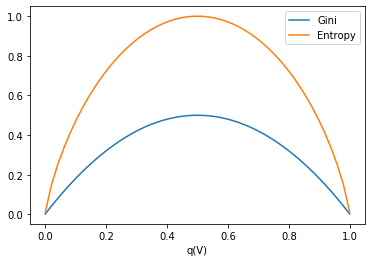

In [22]:
import matplotlib.pyplot as plt

gini = lambda x : 2*x*(1-x)
entropy = lambda x : -(x*np.log2(x)+(1-x)*np.log2(1-x))

x = np.linspace(0 + 0.001, 1 - 0.001)

p_g,  = plt.plot(x, gini(x), label="Gini")
p_e,  = plt.plot(x, entropy(x), label="Entropy")
plt.legend(handles = [p_g, p_e])
plt.xlabel('q(V)')
plt.show()

Both looks similar in that they are both equal to 0 when $q(V)=1$ or $q(V)=0$, and then increases from there, reaching their peak when $q(V)=\frac{1}{2}$. The main differences is that the binary entropy function is scaled and has a higher peak value, as well as looking "rounder".

\newpage

## (b)
As $V_1 \cup V_2=V$ and $V_1 \cap V_2=\varnothing$, we have
$$
p(V_1 \cup V_2,V)=p(V,V) \implies p(V_1,V)+p(V_2,V)-\underbrace{p(V_1 \cap V_2,V)}_{=0}=p(V,V)=1
$$

by the addition formula for the cardinality of the union of sets. Let $\lambda = p(V_1)$, we then have $p(V_2) = 1-\lambda$. As $0\le p(X,Y) \le 1\:\forall X,Y$ by the definition of cardinality, this also applies to $\lambda$. Finally, we have $q(V) = p(V_1)q(V_1)+p(V_2)q(V_2)$ by the law of total probability.

As such:

$$
\begin{aligned}
I(V_1, V_2, V) &= i(q(V)) − (p(V_1, V)i(q(V_1)) + p(V_2, V)i(q(V_2))) \\
               &= i(\lambda q(V_1)+(1-\lambda) q(V_2)) − (\lambda i(q(V_1)) + (1-\lambda)i(q(V_2))) \\
\end{aligned}
$$

As $i(\lambda q(V_1)+(1-\lambda) q(V_2)) \ge (\lambda i(q(V_1)) + (1-\lambda)i(q(V_2)))$ by concavity, we have $I(V_1, V_2, V) \ge 0 \:\forall V_1,V_2,V$.


## (c)

$$
\begin{aligned}
&H(x)&&=-(x\log_2 x+(1-x)\log_2 (1-x)) \implies \\
&\frac{dH(x)}{dx}&&=-(\log_2 x+ \frac{1}{\ln 2} -\log_2 (1-x)-\frac{1}{\ln 2}) \\
& &&=\log (1-x) - \log x \implies \\
&\frac{d^2H(x)}{dx^2}&&=\frac{1}{\ln2}[-\frac{1}{1-x}-\frac{1}{x}] \\
& &&=\frac{1}{\ln2}[-\frac{x}{x(1-x)}-\frac{1-x}{x(1-x)}] \\ \\
& &&=-\frac{1}{\ln2}[\frac{1}{x(1-x)}]
\end{aligned}
$$

We have for $r_1(x)=\frac{1}{x} \ge 0\:\forall x > 0$ and $r_2(x)=\frac{1}{1-x} \ge 0\:\forall x < 1$. As such: $\frac{d^2H(x)}{dx^2}=-\frac{1}{\ln2}r_1(x)r_2(x)\le0 \: \forall x \in (0,1)$


## (d)

We have

$$
\begin{aligned}
&g(x)&&=2x(1-x) = 2x-2x^2 \implies \\
&\frac{dg(x)}{dx}&&=2-4x \implies \\
&\frac{d^2g(x)}{dx^2}&&=-4 \\
& && \le0 \: \forall x \in (0,1)
\end{aligned}
$$

\newpage

#

## (a)
#### Example 1:
We can ask $f_1 \le 3$ and then $f_2 \le 3$ to classify all points.

#### Example 2:
As the data is not axis aligned, and the classes are very "close together", the examples requires many questions to form a "zig zag" pattern. Two questions are not enough in this case.

#### Example 3:
We can ask is $f_2 \le 3$ in the first branch, and then $f_1 \le 2$ if $f_2 \le 3$, and $f_1 \ge 4$ if $f_2 \gt3$ to classify all points.

#### Example 4:
As the data has too many "areas", and is not rectangular, depth 2 is not enough in this case.

## (b)
As example 4 can be solved in 4 splits (see (c)), but examples 3 cannot, this is the most complicated case. As mentioned in (a), the data is not axis aligned, and the classes are very "close together", the examples requires many questions to form a "zig zag" pattern. To separate the blue are, you need to ask for example if $f_1 \ge -0.25$, then if $f_2 \ge -4$, then if $f_1 \ge 0.5$ followed by $f_2 \ge -4.5$. We are already at depth 4, and the boundary is far from covering all the points in the area.

## (c)
With a depth 4 tree, example 4 can be classified. The three could for example look as such:

In [17]:
# f_2 >=2 ?
#     Yes:
#         => red
#     No:
#         f1 <= -2 ?
#         Yes:
#             => red
#         No:
#             f2 <= -2 ?
#             Yes:
#                 => red
#             No:
#                 f1 >= 2 ?
#                 Yes:
#                     => red
#                 No:
#                     => blue

Or summarized: if $f_2 \ge 2$ or $f_2 \le -2$ or $f_1 \le -2$ or $f_1 \ge 2$ then red, otherwise blue

\newpage

#

## (a)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

filenames = ["dataTesting_X.csv", "dataTesting_Y.csv", "dataTraining_X.csv", "dataTraining_Y.csv"]

testing_x, testing_y, training_x, training_y = list(map(lambda f : pd.read_csv(f, header=None), filenames))

In [19]:
mostly_1 = training_y.sum()[0] / len(training_y) >= 0.5
pred_baseline_value = 1 if mostly_1 else 0
print(f'Training was mostly {pred_baseline_value}, predicting that for baseline')

baseline_accuracy_training = accuracy_score(training_y, np.repeat(pred_baseline_value, len(training_y)))
baseline_accuracy_testing = accuracy_score(testing_y, np.repeat(pred_baseline_value, len(testing_y)))

print(f'Baseline training accuracy = {baseline_accuracy_training}')
print(f'Baseline testing accuracy = {baseline_accuracy_testing}')

Training was mostly 0, predicting that for baseline
Baseline training accuracy = 0.5943661971830986
Baseline testing accuracy = 0.6949152542372882


## (b)

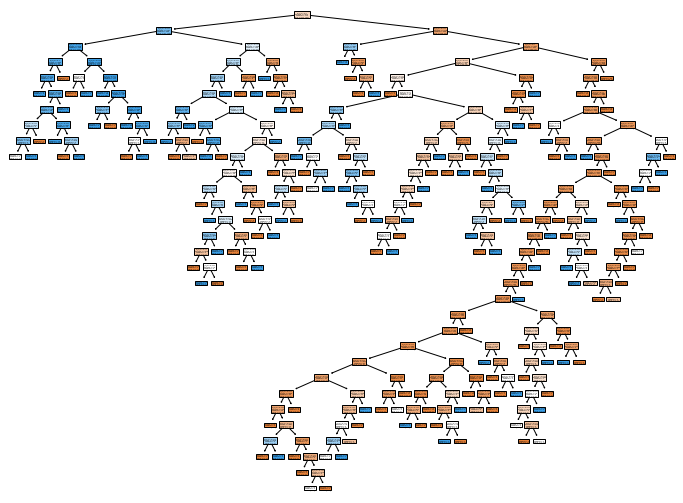

In [20]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

# Fit with training data
decision_tree.fit(training_x, training_y)

plt.figure(figsize=(12, 9))
plot_tree(decision_tree, filled=True)
plt.show()

In [21]:
# Resulting tree looks quite complex

training_y_pred = decision_tree.predict(training_x)
testing_y_pred = decision_tree.predict(testing_x)

accuracy_training = accuracy_score(training_y, training_y_pred)
accuracy_testing = accuracy_score(testing_y, testing_y_pred)

print(f'Decision tree training accuracy = {accuracy_training}')
print(f'Decision tree testing accuracy = {accuracy_testing}')

Decision tree training accuracy = 0.9816901408450704
Decision tree testing accuracy = 0.8022598870056498


Performs better than baseline! 78% accuray on testing data!